In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df_train = pd.read_excel("Data_Train.xlsx")

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test = pd.read_excel("Test_set.xlsx")

In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [8]:
df_train[df_train['Price'] > 70000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [9]:
df_test[df_test['Destination'] == 'Jet Airways Business']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info


In [10]:
df_train.dropna(inplace = True)


In [11]:
df_train.shape

(10682, 11)

In [12]:
df_train = df_train.loc[df_train["Price"] != 79512]
df_train.shape

(10681, 11)

In [13]:
df_train[df_train['Price'] == 79512]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [14]:
df_train["day"] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.day
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [15]:
df_test["day"] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y").dt.day
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24


In [16]:
df_train["month"] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.month
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
df_test['month'] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [18]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [19]:
#we can nwo drop the date of Journey feature

df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [20]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
#extracting the departure hour

df_train["Dep_hour"] = pd.to_datetime(df_train.Dep_Time).dt.hour
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16


In [22]:
#extracting the departure minute
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
#dropping the column departure time
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [23]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [24]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [25]:
df_test["Dep_hour"] = pd.to_datetime(df_test.Dep_Time).dt.hour


In [26]:
df_test["Dep_min"] = pd.to_datetime(df_test.Dep_Time).dt.minute


In [27]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [28]:
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [29]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [30]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [31]:
df_train['Total_Stops']=df_train['Total_Stops'].replace('non-stop','0 stop')
df_test['Total_Stops']=df_test['Total_Stops'].replace('non-stop','0 stop')


In [32]:
df_train['Stop'] = df_train['Total_Stops'].str.split(' ').str[0]
df_test['Stop'] = df_test['Total_Stops'].str.split(' ').str[0]


In [33]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Dep_hour,Dep_min,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,0 stop,No info,3897,24,3,22,20,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,1


In [34]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,Dep_hour,Dep_min,Stop
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,1
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,1
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0,1
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,0 stop,No info,24,6,23,55,0


In [35]:
df_train['Stop']=df_train['Stop'].astype(int)
df_test['Stop']=df_test['Stop'].astype(int)

df_train=df_train.drop(['Total_Stops'],axis=1)
df_test = df_test.drop(['Total_Stops'],axis = 1)

In [36]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Additional_Info,Price,day,month,Dep_hour,Dep_min,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,No info,3897,24,3,22,20,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,No info,7662,1,5,5,50,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,No info,13882,9,6,9,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,No info,6218,12,5,18,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,No info,13302,1,3,16,50,1


In [37]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Additional_Info,day,month,Dep_hour,Dep_min,Stop
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,No info,6,6,17,30,1
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,No info,12,5,6,20,1
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,In-flight meal not included,21,5,19,15,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,No info,21,5,8,0,1
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,No info,24,6,23,55,0


In [38]:
s=pd.to_timedelta(df_train['Duration'])
df_train['hours']=s.dt.components['hours']
df_train['minutes']=s.dt.components['minutes']
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Additional_Info,Price,day,month,Dep_hour,Dep_min,Stop,hours,minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,No info,3897,24,3,22,20,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,No info,7662,1,5,5,50,2,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,No info,13882,9,6,9,25,2,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,No info,6218,12,5,18,5,1,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,No info,13302,1,3,16,50,1,4,45


In [39]:
s=pd.to_timedelta(df_test['Duration'])
df_test['hours']=s.dt.components['hours']
df_test['minutes']=s.dt.components['minutes']
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Additional_Info,day,month,Dep_hour,Dep_min,Stop,hours,minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,No info,6,6,17,30,1,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,No info,12,5,6,20,1,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,In-flight meal not included,21,5,19,15,1,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,No info,21,5,8,0,1,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,No info,24,6,23,55,0,2,50


In [40]:
#dropping the duration column
df_train=df_train.drop(['Duration'],axis=1)
df_test=df_test.drop(['Duration'],axis = 1)

In [41]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Additional_Info,Price,day,month,Dep_hour,Dep_min,Stop,hours,minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,No info,3897,24,3,22,20,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,No info,7662,1,5,5,50,2,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,No info,13882,9,6,9,25,2,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,No info,6218,12,5,18,5,1,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,No info,13302,1,3,16,50,1,4,45


In [42]:
df_train = df_train.drop(['Additional_Info'], axis = 1)
df_test = df_test.drop(['Additional_Info'], axis = 1)

In [43]:
df_train.head()


,Airline,Source,Destination,Route,Arrival_Time,Price,day,month,Dep_hour,Dep_min,Stop,hours,minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,3897,24,3,22,20,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7662,1,5,5,50,2,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,13882,9,6,9,25,2,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,6218,12,5,18,5,1,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,13302,1,3,16,50,1,4,45


In [44]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,day,month,Dep_hour,Dep_min,Stop,hours,minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,6,6,17,30,1,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,12,5,6,20,1,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,21,5,19,15,1,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,21,5,8,0,1,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,24,6,23,55,0,2,50


In [45]:
df_train.shape

(10681, 13)

In [46]:
df_test.shape

(2671, 12)

In [47]:
#one-hot encoding for cat variable

Airline = df_train[["Airline"]]
airline = pd.get_dummies(Airline, drop_first = True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
source = df_train[["Source"]]
source = pd.get_dummies(source, drop_first = True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [49]:
destination = df_train[["Destination"]]
destination = pd.get_dummies(destination, drop_first = True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [50]:

# Route and Total_Stops are related to each other

df_train.drop(["Route"], axis = 1, inplace = True)   
df_test.drop(["Route"], axis = 1, inplace = True)   


In [51]:
# Concatenate dataframe --> df_train + airline + source + destination

data_train = pd.concat([df_train, airline, source, destination], axis = 1)
data_train.head()

,Airline,Source,Destination,Arrival_Time,Price,day,month,Dep_hour,Dep_min,Stop,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,3897,24,3,22,20,0,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,13:15,7662,1,5,5,50,2,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,13882,9,6,9,25,2,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,23:30,6218,12,5,18,5,1,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,21:35,13302,1,3,16,50,1,...,0,0,0,0,0,0,0,0,0,1


In [52]:
data_train.shape

(10681, 32)

In [53]:
#one-hot encoding for cat variable

Airline = df_test[["Airline"]]
airline = pd.get_dummies(Airline, drop_first = True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [54]:
source = df_test[["Source"]]
source = pd.get_dummies(source, drop_first = True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [55]:
destination = df_test[["Destination"]]
destination = pd.get_dummies(destination, drop_first = True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [56]:
# Concatenate dataframe --> df_test + airline + source + destination

data_test = pd.concat([df_test, airline, source, destination], axis = 1)
data_test.head()

,Airline,Source,Destination,Arrival_Time,day,month,Dep_hour,Dep_min,Stop,hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,6,6,17,30,1,10,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,10:20,12,5,6,20,1,4,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19:00 22 May,21,5,19,15,1,23,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,21:00,21,5,8,0,1,13,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,24,6,23,55,0,2,...,0,0,0,0,0,0,1,0,0,0


In [57]:
data_test.shape

(2671, 30)

In [58]:
data_train.columns

Index(['Airline', 'Source', 'Destination', 'Arrival_Time', 'Price', 'day',
       'month', 'Dep_hour', 'Dep_min', 'Stop', 'hours', 'minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [59]:
data_test.columns

Index(['Airline', 'Source', 'Destination', 'Arrival_Time', 'day', 'month',
       'Dep_hour', 'Dep_min', 'Stop', 'hours', 'minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [60]:
data_train['Airline_Trujet'].value_counts()

0    10680
1        1
Name: Airline_Trujet, dtype: int64

In [61]:
df_test.shape

(2671, 11)

In [62]:
df_test.head()

,Airline,Source,Destination,Arrival_Time,day,month,Dep_hour,Dep_min,Stop,hours,minutes
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,6,6,17,30,1,10,55
1,IndiGo,Kolkata,Banglore,10:20,12,5,6,20,1,4,0
2,Jet Airways,Delhi,Cochin,19:00 22 May,21,5,19,15,1,23,45
3,Multiple carriers,Delhi,Cochin,21:00,21,5,8,0,1,13,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,24,6,23,55,0,2,50


In [63]:
df_train[df_train['Airline']== 'Trujet']

,Airline,Source,Destination,Arrival_Time,Price,day,month,Dep_hour,Dep_min,Stop,hours,minutes
2878,Trujet,Mumbai,Hyderabad,16:20,4140,6,3,13,5,1,3,15


In [64]:
data_train.drop(["Airline_Trujet"], axis = 1, inplace = True)

In [65]:
data_train.shape

(10681, 31)

In [66]:
data_test.shape

(2671, 30)

In [67]:
data_train.head()

,Airline,Source,Destination,Arrival_Time,Price,day,month,Dep_hour,Dep_min,Stop,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,3897,24,3,22,20,0,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,13:15,7662,1,5,5,50,2,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,13882,9,6,9,25,2,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,23:30,6218,12,5,18,5,1,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,21:35,13302,1,3,16,50,1,...,0,0,0,0,0,0,0,0,0,1


In [68]:
X = data_train.loc[:,['Airline', 'Source', 'Destination', 'Arrival_Time', 'day',
       'month', 'Dep_hour', 'Dep_min', 'Stop', 'hours', 'minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
        'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [77]:
#y = data_train.loc[:,['Price']]


In [80]:
#type(y)

pandas.core.frame.DataFrame

In [81]:
y = data_train['Price']

In [82]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10681, dtype: int64

In [69]:
X.head()

,Airline,Source,Destination,Arrival_Time,day,month,Dep_hour,Dep_min,Stop,hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,24,3,22,20,0,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,13:15,1,5,5,50,2,7,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,9,6,9,25,2,19,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,23:30,12,5,18,5,1,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,21:35,1,3,16,50,1,4,...,0,0,0,0,0,0,0,0,0,1


In [70]:
data_test.head()

,Airline,Source,Destination,Arrival_Time,day,month,Dep_hour,Dep_min,Stop,hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,6,6,17,30,1,10,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,10:20,12,5,6,20,1,4,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19:00 22 May,21,5,19,15,1,23,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,21:00,21,5,8,0,1,13,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,24,6,23,55,0,2,...,0,0,0,0,0,0,1,0,0,0


In [71]:
X.drop(["Airline", "Source", "Destination","Arrival_Time"], axis = 1, inplace = True)
data_test.drop(["Airline", "Source", "Destination","Arrival_Time"], axis = 1, inplace = True)

In [72]:
X.head()

,day,month,Dep_hour,Dep_min,Stop,hours,minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24,3,22,20,0,2,50,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,5,5,50,2,7,25,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9,6,9,25,2,19,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12,5,18,5,1,5,25,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,3,16,50,1,4,45,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [73]:
data_test.head()

,day,month,Dep_hour,Dep_min,Stop,hours,minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6,6,17,30,1,10,55,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,12,5,6,20,1,4,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,21,5,19,15,1,23,45,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,21,5,8,0,1,13,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24,6,23,55,0,2,50,0,0,0,...,0,0,0,0,0,0,1,0,0,0


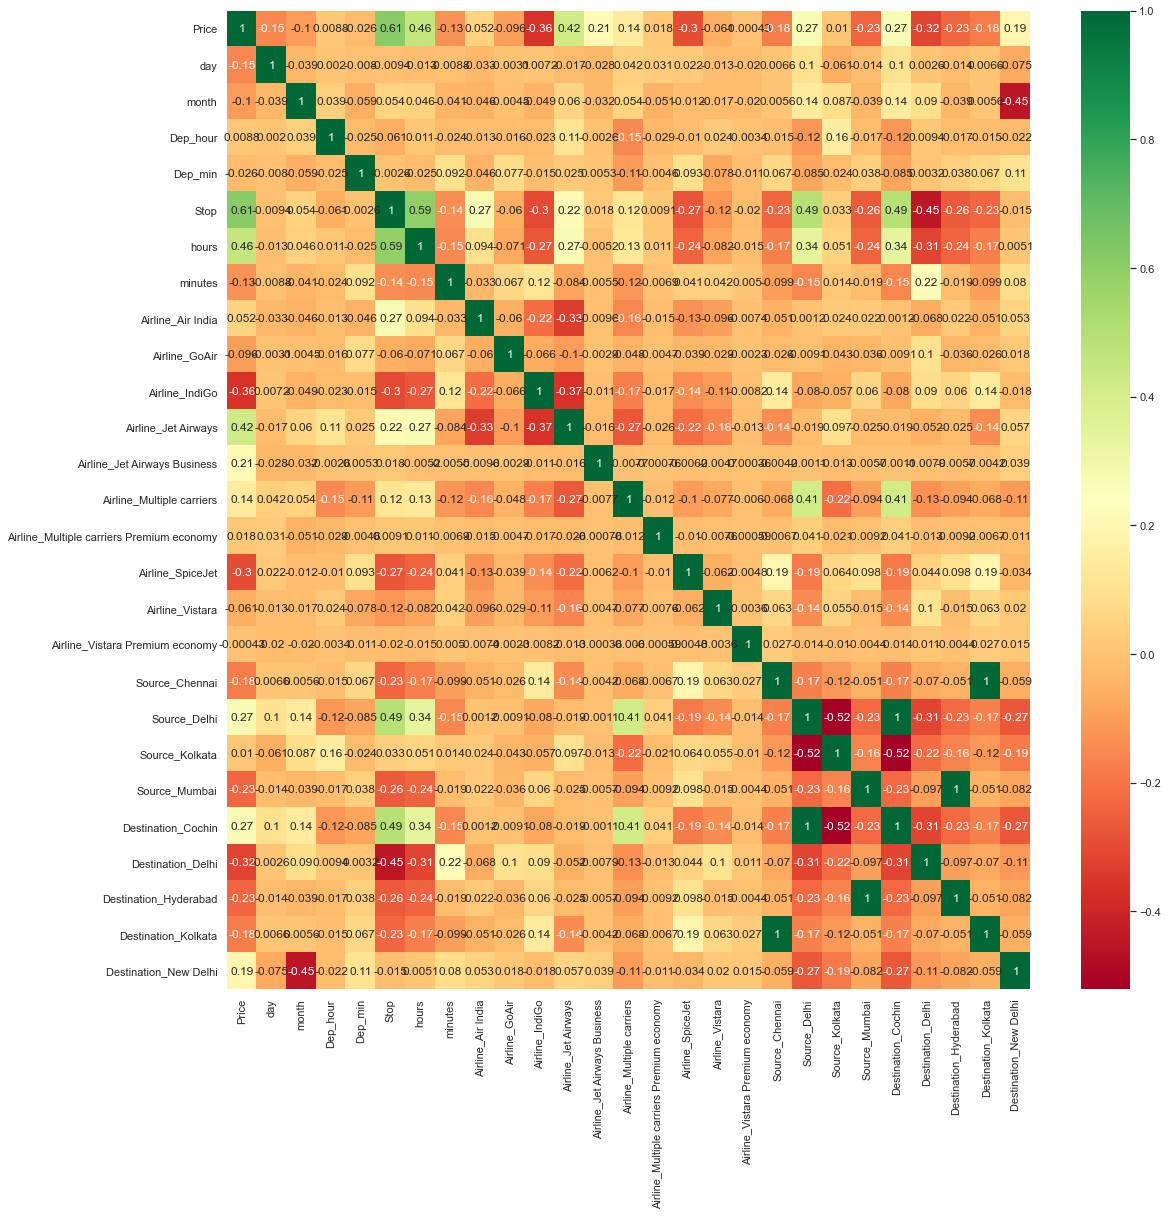

In [74]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [83]:
#findign the best features to fit


# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [84]:
print(selection.feature_importances_)

[1.46603819e-01 5.62698725e-02 3.86107530e-02 3.05107858e-02
 2.50781850e-01 1.14959623e-01 2.81368987e-02 1.56226387e-02
 2.33893795e-03 2.29917860e-02 1.34751864e-01 4.76113297e-02
 1.58969014e-02 8.06111916e-04 4.17149577e-03 6.45194578e-03
 1.22917509e-04 6.79052010e-04 1.02079022e-02 3.73135595e-03
 6.11184426e-03 1.26706617e-02 1.58816677e-02 8.01701041e-03
 6.14357756e-04 2.54466175e-02]


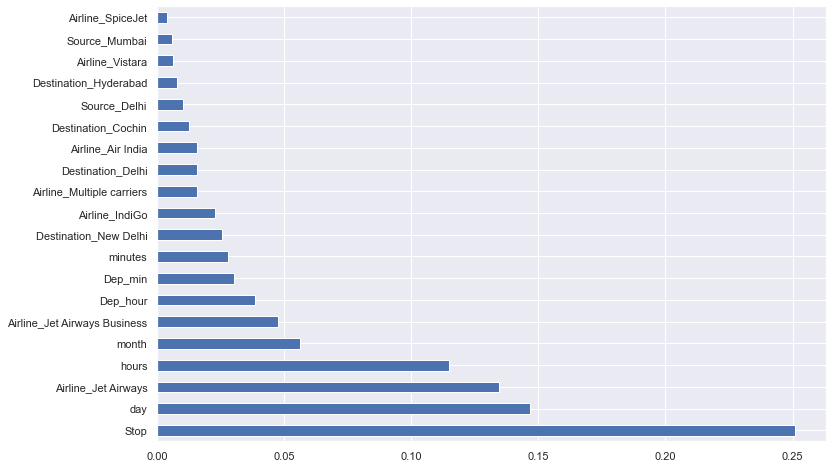

In [85]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [86]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
y_pred = reg_rf.predict(X_test)


In [89]:
reg_rf.score(X_train, y_train)


0.9522697670096762

In [90]:
reg_rf.score(X_test, y_test)


0.8339405563835194

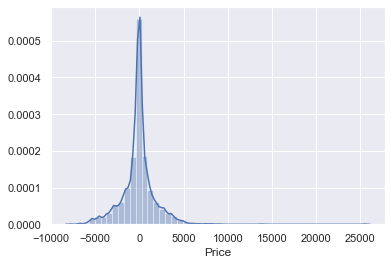

In [91]:

sns.distplot(y_test-y_pred)
plt.show()

In [92]:
y_pred_test = reg_rf.predict(data_test)


In [93]:
y_pred_test

array([10630.9575,  4226.    , 14694.722 , ..., 15998.756 , 15154.34  ,
        7636.75  ])

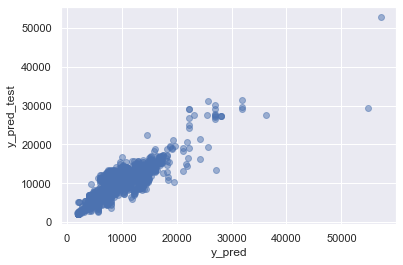

In [94]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_pred")
plt.ylabel("y_pred_test")
plt.show()

In [95]:
type(y_pred_test)

numpy.ndarray

In [96]:
Price_test = pd.DataFrame(y_pred_test, columns = ['Price'])
Price_test.head()

,Price
0,10630.957500
1,4226.000000
2,14694.722000
3,12662.027333
4,3760.190000


In [97]:
Price_test.dtypes

Price    float64
dtype: object

In [98]:
Price_test.shape

(2671, 1)

In [99]:
final_test = pd.concat([df_test, Price_test], axis = 1)

In [100]:
final_test.head()

,Airline,Source,Destination,Arrival_Time,day,month,Dep_hour,Dep_min,Stop,hours,minutes,Price
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,6,6,17,30,1,10,55,10630.957500
1,IndiGo,Kolkata,Banglore,10:20,12,5,6,20,1,4,0,4226.000000
2,Jet Airways,Delhi,Cochin,19:00 22 May,21,5,19,15,1,23,45,14694.722000
3,Multiple carriers,Delhi,Cochin,21:00,21,5,8,0,1,13,0,12662.027333
4,Air Asia,Banglore,Delhi,02:45 25 Jun,24,6,23,55,0,2,50,3760.190000
